In [2]:
#pip install pystan
#conda install -c conda-forge libgcc-ng
#conda install -c conda-forge prophet
#pip install ipywidgets
#pip install plotly

In [3]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

from sklearn.metrics import r2_score

In [4]:
df = pd.read_excel('C://Users/jiyong.cheng/OneDrive - Seagroup/Desktop/ES/ES_ADO_Estimation.xlsx',sheet_name = 'BF',parse_dates=True)
df = df.rename(columns={'Date':'ds', 'A1_Existing':'y'})

In [5]:
'''df1 = pd.read_excel('C://Users/jiyong.cheng/OneDrive - Seagroup/Desktop/ES/ES_ADO_Estimation.xlsx',sheet_name = 'BF',parse_dates=True)
df1 = df1.rename(columns={'grass_date':'ds', 'a1_repeat':'y'})'''

"df1 = pd.read_excel('C://Users/jiyong.cheng/OneDrive - Seagroup/Desktop/ES/ES_ADO_Estimation.xlsx',sheet_name = 'BF',parse_dates=True)\ndf1 = df1.rename(columns={'grass_date':'ds', 'a1_repeat':'y'})"

In [6]:
# Shopee Campaign Day
VoucherDay = pd.DataFrame({
  'holiday': 'VoucherDay',
  'ds': pd.to_datetime(['2021-11-08','2021-11-22',
                        '2021-12-06','2021-12-13','2021-12-20',
                        '2022-01-10','2022-01-17','2022-01-24','2022-01-31',
                        '2022-02-02','2022-02-28',
                        '2022-03-21',
                        '2022-05-16']),
  'lower_window': 0,
  'upper_window': 1,
})
CFSDay = pd.DataFrame({
  'holiday': 'CFSDay',
  'ds': pd.to_datetime(['2021-11-04',
                        '2021-12-05',
                        '2022-01-09','2022-01-16','2022-01-23','2022-01-30',
                        '2022-02-27',
                        '2022-03-10','2022-03-29',
                        '2022-04-10']),
  'lower_window': 0,
  'upper_window': 1,
})
LPPDay = pd.DataFrame({
  'holiday': 'LPPDay',
  'ds': pd.to_datetime(['2021-11-05','2021-11-18','2021-11-25',
                        '2021-12-02','2021-12-09','2021-12-16','2021-12-23',
                        '2022-01-13','2022-01-20','2022-01-27',
                        '2022-03-24','2022-03-31',
                        '2022-04-07','2022-04-14',
                        '2022-05-12']),
  'lower_window': 0,
  'upper_window': 1,
})
Openning = pd.DataFrame({
  'holiday': 'Openning',
  'ds': pd.to_datetime(['2021-11-01','2021-11-15','2021-11-29',
                        '2021-12-01',
                        '2021-01-01','2021-01-07',
                        '2022-02-21',
                        '2022-03-28',
                        '2022-04-21',
                        '2022-05-05']),
  'lower_window': 0,
  'upper_window': 1,
})
SuperSpike = pd.DataFrame({
  'holiday': 'SuperSpike',
  'ds': pd.to_datetime(['2021-11-11','2021-11-26',
                        '2021-12-12',
                        '2022-03-03',
                        '2022-04-04',
                        '2022-05-09']),
  'lower_window': 0,
  'upper_window': 2,
})
holidays = pd.concat((VoucherDay,CFSDay,LPPDay,Openning,SuperSpike))

In [7]:
#Number of hour have PN
PN1 = pd.DataFrame({
  'holiday': 'PN1',
  'ds': pd.to_datetime(['2021-10-26','2021-10-29','2021-10-31',
                        '2021-11-01','2021-11-05','2021-11-08','2021-11-10','2021-11-15','2021-11-18','2021-11-22','2021-11-27','2021-11-28',
                        '2021-12-01','2021-12-02','2021-12-03','2021-12-05','2021-12-06','2021-12-09','2021-12-11','2021-12-13','2021-12-20','2021-12-30',
                        '2022-01-01','2022-01-02','2022-01-05','2022-01-06','2022-01-09','2022-01-10','2022-01-13','2022-01-16','2022-01-20','2022-01-27',
                        '2022-02-02','2022-02-03','2022-02-10','2022-02-12','2022-02-18','2022-02-19','2022-02-21','2022-02-22','2022-02-24','2022-02-26','2022-02-27','2022-02-28',
                        '2022-03-01','2022-03-05','2022-03-06','2022-03-08','2022-03-09','2022-03-12','2022-03-13','2022-03-14','2022-03-19','2022-03-20','2022-03-21','2022-03-22','2022-03-26','2022-03-28','2022-03-29','2022-03-31',
                        '2022-04-01','2022-04-07','2022-04-10','2022-04-11','2022-04-14','2022-04-22','2022-04-24','2022-04-27','2022-04-30',
                        '2022-05-01','2022-05-03','2022-05-06','2022-05-12','2022-05-17','2022-05-18','2022-05-19','2022-05-20','2022-05-23','2022-05-27']),
  'lower_window': 0,
  'upper_window': 1,
})
PN2 = pd.DataFrame({
  'holiday': 'PN2',
  'ds': pd.to_datetime(['2021-11-04','2021-11-24','2021-11-25','2021-11-29',
                        '2021-12-16',
                        '2022-01-07',
                        '2022-02-16',
                        '2022-03-10','2022-03-24',
                        '2022-04-17','2022-04-21','2022-04-28','2022-04-29',
                        '2022-05-05','2022-05-26']),
  'lower_window': 0,
  'upper_window': 1,
})
PN3 = pd.DataFrame({
  'holiday': 'PN3',
  'ds': pd.to_datetime(['2021-11-11',
                        '2021-12-12',
                        '2022-03-17']),
  'lower_window': 0,
  'upper_window': 1,
})
PN4 = pd.DataFrame({
  'holiday': 'PN4',
  'ds': pd.to_datetime(['2022-03-03']),
  'lower_window': 0,
  'upper_window': 1,
})
PN5 = pd.DataFrame({
  'holiday': 'PN5',
  'ds': pd.to_datetime(['2021-11-26',
                        '2022-04-04',
                        '2022-05-09']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((holidays,PN1,PN2,PN3,PN4,PN5))

In [8]:
# Auto test changepoint_prior_scale and seasonality_prior_scale for best config
param_grid = {  
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

cutoffs = pd.to_datetime(['2022-04-05', '2022-05-12'])

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).add_country_holidays(country_name='ES').fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='7 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results[tuning_results['rmse'] == tuning_results['rmse'].min()]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000015EF29BF520>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

,changepoint_prior_scale,seasonality_prior_scale,rmse
48,10.0,10.0,7718.330881


In [9]:
# Introduce prophet function and set both prior scale
m = Prophet(changepoint_prior_scale=1, seasonality_prior_scale=1,holidays=holidays)
# Introduct holiday for ES including all campaign day and PN day indicate above
m.add_country_holidays(country_name='ES')
m.fit(df)
#forecast = m.fit(df).predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [10]:
#m1 = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=1.0,holidays=holidays)
#m1.add_country_holidays(country_name='ES')
#m1.fit(df1)
#forecast = m.fit(df).predict(future)

In [11]:
future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)

#future1 = m1.make_future_dataframe(periods=50)
#forecast1 = m1.predict(future1)

c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [12]:
plot_plotly(m, forecast)

In [13]:
#plot_plotly(m1, forecast1)

In [14]:
plot_components_plotly(m, forecast)

c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [15]:
#forecast = forecast.rename(columns={"yhat":"A1_Existing_New"})
#forecast = forecast[['ds','A1_Existing_New']]
#forecast1 = forecast1.rename(columns={"yhat":"A1_Existing_Repeat"})
#forecast1 = forecast1[['ds','A1_Existing_Repeat']]

In [16]:
#result = forecast.merge(forecast1,how = 'outer',on = 'ds')

In [17]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
                                   ...      
weekly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
Length: 88, dtype: object

In [18]:
forecast[forecast['ds']>'2022-05-10']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Asunción de la Virgen,Asunción de la Virgen_lower,Asunción de la Virgen_upper,Asunción de la Virgen (Trasladado),...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
212,2022-05-11,54535.606007,52539.713861,60225.900727,54535.606007,54535.606007,0.0,0.0,0.0,0.0,...,787.999670,787.999670,787.999670,806.305339,806.305339,806.305339,0.0,0.0,0.0,56129.911016
213,2022-05-12,54314.694145,55964.159589,63681.534308,54314.694145,54314.694145,0.0,0.0,0.0,0.0,...,3989.346732,3989.346732,3989.346732,1431.513316,1431.513316,1431.513316,0.0,0.0,0.0,59735.554193
214,2022-05-13,54093.782282,48472.378068,56564.950821,54093.782282,54093.782282,0.0,0.0,0.0,0.0,...,-465.909330,-465.909330,-465.909330,-1127.527145,-1127.527145,-1127.527145,0.0,0.0,0.0,52500.345807
215,2022-05-14,53872.870420,45504.476443,52824.802224,53872.870420,53872.870420,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-4668.784713,-4668.784713,-4668.784713,0.0,0.0,0.0,49204.085707
216,2022-05-15,53651.958557,48398.264484,56491.044309,53651.958557,53651.958557,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-1103.104839,-1103.104839,-1103.104839,0.0,0.0,0.0,52548.853718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-07-06,42164.541704,-14293.659931,103442.206531,-15130.719710,101618.975356,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,806.305339,806.305339,806.305339,0.0,0.0,0.0,42970.847043
269,2022-07-07,41943.629842,-16459.287572,106115.522673,-17082.514478,103088.093013,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1431.513316,1431.513316,1431.513316,0.0,0.0,0.0,43375.143158
270,2022-07-08,41722.717979,-21128.310970,105112.406220,-19560.039733,105452.999699,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-1127.527145,-1127.527145,-1127.527145,0.0,0.0,0.0,40595.190834
271,2022-07-09,41501.806117,-27331.376748,101867.011801,-21731.798348,106877.088039,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-4668.784713,-4668.784713,-4668.784713,0.0,0.0,0.0,36833.021404


In [19]:
forecast.to_csv('ES_prophet_PNTest.csv')

In [20]:
#result.to_csv('ES_prophet_Mar_Sep.csv')

In [21]:
print("Prophet_TimeSeries_ES Finished!")

Prophet_TimeSeries_ES Finished!


Below is test case for different trails

In [22]:
test = df[df['ds'] < '2022-05-01']
test = df[df['ds'] >= '2022-02-01']

In [23]:
# Set seasonality_mode as multiplicative due to growing A1 don't suit for fix number of increase
testm = Prophet(changepoint_prior_scale=1, seasonality_prior_scale=1,holidays=holidays, seasonality_mode='multiplicative')
testm.add_country_holidays(country_name='ES')
testm.fit(test)
#forecast = m.fit(df).predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [24]:
# Set periods as 50 for days need predict
futurem = testm.make_future_dataframe(periods=50)
forecasttest = testm.predict(futurem)

c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [25]:
forecasttest.to_csv('test.csv')

In [26]:
plot_components_plotly(testm, forecasttest)

c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [27]:
result1 = forecasttest[forecasttest['ds'] >= '2022-05-01'][['ds','yhat']]

In [28]:
result2 = result1.join(df[df['ds'] >= '2022-05-01'][['ds','y']].set_index('ds'), on = 'ds', how = 'left')

In [29]:
result2 = result2[result2['y'].notnull()]

In [30]:
y_true = result2['y'].to_numpy()
y_pred = result2['yhat'].to_numpy()

In [31]:
dates = ['2022-05-05','2022-05-09']
#result2 = result2[result2['ds'] != '2022-05-05']
#result2 = result2[result2['ds'] != '2022-05-09']

In [32]:
r2_score(y_true,y_pred)

0.9076948871498928

In [33]:
result2

,ds,yhat,y
89,2022-05-01,59216.517983,55809.0
90,2022-05-02,58310.097084,58309.0
91,2022-05-03,62955.814349,61670.0
92,2022-05-04,57334.450150,56207.0
93,2022-05-05,68223.752313,72148.0
94,2022-05-06,62209.466313,63746.0
95,2022-05-07,48719.024914,49813.0
96,2022-05-08,53092.342937,57244.0
97,2022-05-09,84412.501854,92844.0
98,2022-05-10,62299.611145,61086.0


In [34]:
np.corrcoef(y_true,y_pred)

array([[1.       , 0.9708985],
       [0.9708985, 1.       ]])

In [35]:
forecasttest[forecasttest['ds'] > '2022-05-20'][['ds','yhat']]

,ds,yhat
109,2022-05-21,46489.471687
110,2022-05-22,50654.683083
111,2022-05-23,57752.682496
112,2022-05-24,55224.092086
113,2022-05-25,52899.918441
114,2022-05-26,59775.453685
115,2022-05-27,55098.954029
116,2022-05-28,45374.695073
117,2022-05-29,49435.853156
118,2022-05-30,52436.675999


To Auto tunning the start/end date for trainning dataset

In [36]:
Raw_Data = pd.read_excel('C://Users/jiyong.cheng/OneDrive - Seagroup/Desktop/ES/ES_ADO_Estimation.xlsx',sheet_name = 'BF',parse_dates=True)
Raw_Data = Raw_Data.rename(columns={'Date':'ds', 'A1_Existing':'y'})

In [1]:
holidays

NameError: name 'holidays' is not defined

In [43]:
param_grid = {  
    'changepoint_prior_scale': [0.01, 0.5, 1.0, 2.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.01, 0.5, 1.0, 2.0, 5.0, 10.0],
    }

def prior_scale(start_date, end_date):
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmses = []  # Store the RMSEs for each params here
    cutoffs = pd.to_datetime([start_date, end_date])
    for params in all_params:
        m = Prophet(**params).add_country_holidays(country_name='ES').fit(df)  # Fit model with given params
        df_cv = cross_validation(m, cutoffs=cutoffs, horizon='7 days', parallel="processes")
        df_p = performance_metrics(df_cv, rolling_window=1)
        rmses.append(df_p['rmse'].values[0])
    tuning_results = pd.DataFrame(all_params)
    tuning_results['rmse'] = rmses
    return tuning_results[tuning_results['rmse'] == tuning_results['rmse'].min()]

In [41]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(20)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,5.057257e+07,7111.439552,6963.587550,0.119243,0.119243,0.112486,0.5
1,2 days,2.958508e+07,5439.217251,5206.608001,0.099873,0.099873,0.094049,0.5
2,3 days,6.780015e+07,8234.084389,8225.064083,0.153236,0.153236,0.142030,0.0
3,4 days,9.413738e+07,9702.442191,9276.471272,0.168488,0.168488,0.154355,0.0
4,5 days,6.072189e+07,7792.425461,7386.537040,0.119990,0.119990,0.115440,0.5
5,6 days,5.352968e+07,7316.398157,6171.742304,0.098080,0.098080,0.092098,0.5
6,7 days,6.066166e+07,7788.559399,5924.688166,0.095014,0.095014,0.087880,0.5


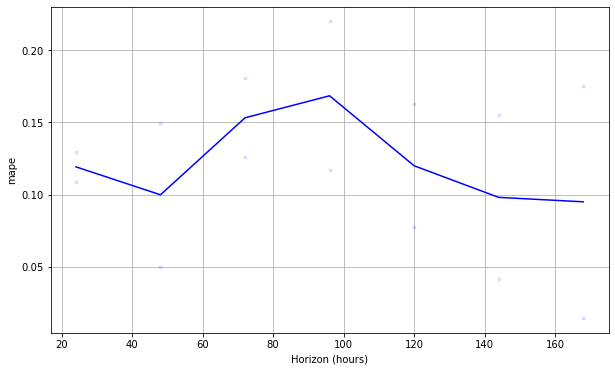

In [42]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [44]:
prior_scale('2022-02-01','2022-05-01')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000015EF4CCFCA0>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\jiyong.cheng\Anaconda3\envs\pythonProject\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:Appl

,changepoint_prior_scale,seasonality_prior_scale,rmse
7,0.5,0.5,5691.402002


In [ ]:
# Auto test changepoint_prior_scale and seasonality_prior_scale for best config
param_grid = {  
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

cutoffs = pd.to_datetime(['2022-04-05', '2022-05-12'])

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).add_country_holidays(country_name='ES').fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='7 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results[tuning_results['rmse'] == tuning_results['rmse'].min()]